In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [3]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')

In [4]:
def decision_boundary(X, y, mean, std, theta, ax=None, threshold=0.5, contourf=False):
    x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Marks in 1st Exam')
    plt.ylabel('Marks in 2nd Exam')
    plt.legend()
    plt.show()

In [5]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [6]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [7]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [8]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [9]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    
    J = (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))).mean()
    return J

In [10]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    d_theta = None    
    return d_theta

In [11]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        theta = theta - alpha*np.dot(X.T, (h(X, theta) - y))/m;
        
        J = cost_function(X, y, theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [12]:
def predict(X, mean, std, theta):
    Xtest = prepare_X(X)
    predictions = h(Xtest, theta)
    return predictions

In [13]:
# Dataset 'sats.csv'
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


In [14]:
# Dataset 'tests.csv'
data_columns = ["test1", "test2"]
target_column = "passed"
X_test, y_test = load_datasets('tests.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


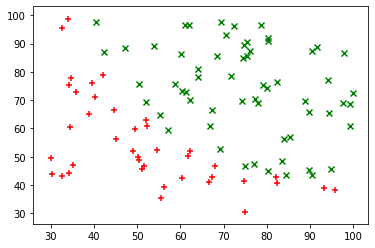

In [15]:
plot_data(X, y)

In [16]:
X_new, mean, std = normalize(X)

In [17]:
X_new = prepare_X(X_new)
y_new = y.values.reshape((X.shape[0], 1))

In [18]:
theta = np.array([0, 0, 0])

In [19]:
cost_function(X_new, y_new, theta)

0.6931471805599453

In [20]:
new_theta, Js = gradient_descent(X_new, y, theta, 0.01, 1e-7, 10000, False)
print(new_theta, len(Js))

[1.2677702  3.05550587 2.81891901] 10001


In [21]:
cost_function(X_new, y_new, new_theta)

1.769610810302692

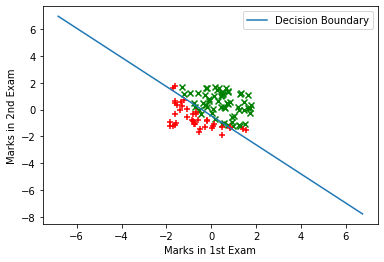

In [22]:
plot_data((X-mean)/std, y)
X_plot = prepare_X((X-mean)/std)
decision_boundary(X_plot, y, mean, std, new_theta, ax=None, threshold=0.5, contourf=False)

In [23]:
T = np.array([[40, 40], [60, 65]])
print(predict(T, mean, std, new_theta))


[1. 1.]


In [24]:
print(h(X_new, new_theta));

[1.40281390e-01 4.65797951e-04 8.33369039e-02 9.69444027e-01
 9.91456197e-01 3.03676456e-02 9.94234003e-01 4.39605742e-01
 9.97817619e-01 6.84896152e-01 8.53933659e-01 6.51218803e-02
 9.95682268e-01 9.98681400e-01 2.07056614e-01 9.48899229e-01
 4.40446072e-01 2.08283821e-01 9.97776981e-01 5.54557757e-01
 1.18355496e-01 9.93155620e-01 2.32205111e-02 9.04533854e-04
 9.73744534e-01 7.86552173e-01 5.75802748e-01 8.05603528e-01
 1.47656857e-01 4.16538237e-02 8.31611500e-01 9.51646513e-01
 2.09619122e-01 4.05988279e-01 1.22208586e-01 7.00479962e-02
 7.75196711e-01 9.63214381e-01 2.62062845e-01 9.07244737e-02
 9.32825609e-01 2.01640669e-02 9.96635130e-01 5.02508522e-01
 1.60040019e-02 1.95026053e-01 9.76428714e-01 9.99919190e-01
 9.95230787e-01 9.99841138e-01 9.91146073e-01 9.96846498e-01
 8.47453057e-01 1.09580790e-02 2.57233379e-02 9.73899843e-02
 9.98762376e-01 6.29847137e-01 9.59511511e-01 9.83525210e-01
 9.96867620e-01 1.63885775e-03 1.34320775e-02 1.06605673e-03
 1.20101122e-01 8.314379